In [2]:
import gzip
import numpy as np
import pandas as pd
import matplotlib as plt
import gmaps
import gmaps.datasets
import gmaps.geojson_geometries
%matplotlib inline
import matplotlib.pyplot as plt
import os
os.environ["PROJ_LIB"] = "C:/Users/User/Anaconda3/pkgs/proj4-5.2.0-ha925a31_1/Library/share"
import gmplot
#import basemap
from mpl_toolkits import basemap
from mpl_toolkits.basemap import Basemap
import requests 

In [3]:
f_new=pd.read_csv('C:/Users/User/Downloads/dump.csv/select___from_scans__where_device_in_965.csv', sep=',',  encoding='latin1', engine='python')

In [4]:
f_new['ts']=f_new['deafult_ts'].astype('datetime64[ns]')

In [5]:
import datetime

f_new['weekday']=f_new['ts'].dt.weekday_name


In [6]:
df=f_new[pd.notnull(f_new['city'])]


In [7]:
plt.rcParams['figure.figsize']=(8,4)

In [8]:
ff=df.groupby(['city'])['device','mac_addr'].count()
ff.to_csv('out.csv')


In [9]:
df_1= df.set_index(['ts'])
df_1.drop(['id','oui', 'ssid','rssi', 'channel', 'created', 'kinesis_ts', 'deafult_ts'], axis=1, inplace=True)

Text(0.5, 0, 'Hour')

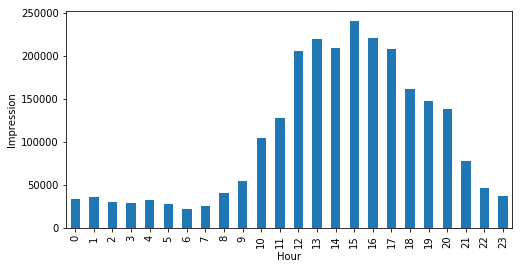

In [10]:
pl=df.groupby(['hour'])['mac_addr'].count()
pl.plot(kind='bar')
plt.ylabel('Impression')
plt.xlabel('Hour')


In [11]:
pl_1=pd.DataFrame({'hr': pl.index, 'imp': pl.values})

In [12]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

import os
import numpy as np

init_notebook_mode(connected=True)

In [56]:

x = pl_1.hr
y = pl_1.imp

data = [go.Bar(x=x, y=y)]

layout = go.Layout(
    title='',
    
    xaxis=dict(title='Hour',tickfont=dict(size=13), titlefont=dict(size=27), tickmode='linear'), 
    
    yaxis=dict(title='No of People Exposed to Ads.',tickfont=dict(size=20), titlefont=dict(size=20)))
    
   
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='style-bar')



In [57]:

import plotly
if not os.path.exists('images'):
    os.mkdir('images')
    
pio.write_image(fig, 'images/fig1.png')
plotly.offline.plot(fig, filename='fig3.html') 

'fig3.html'

In [16]:
import plotly.io as pio

static_image_bytes = pio.to_image(fig, format='png')

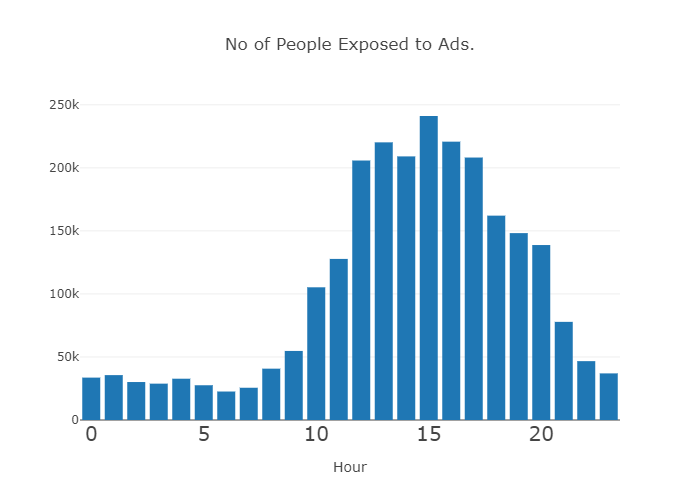

In [17]:
from IPython.display import Image

Image(static_image_bytes)

In [18]:
nfrom IPython.display import IFrame
IFrame(src= "https://dash-simple-apps.plotly.host/dash-barplot/code", width="80%", height=500, frameBorder="0")

SyntaxError: invalid syntax (<ipython-input-18-afbd31e84d5b>, line 1)

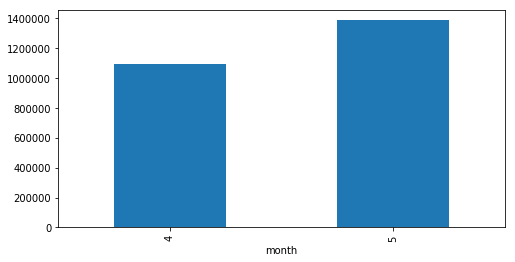

In [19]:
df.groupby(['month'])['mac_addr'].count().plot.bar()

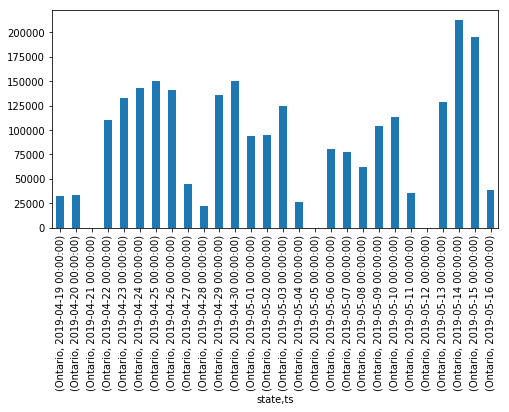

In [20]:
df_1.groupby('state').resample('D')['mac_addr'].count().plot.bar()

In [21]:
dic= {965: '29', 2808: '29', 2859: '29', 2791:'29', 
      945: '35', 2739: '35',
      2848:'59', 1016:'59', 1237:'59', 1007:'59', 2691: '59', 1098:'59', 1209: '59',
      1348: '82', 1128:'82', 2849: '82'
     }

In [22]:
df_1['device'].replace(dic, inplace=True)
df_1.head()

,lon,lat,speed,device,mac_addr,timestamp,alt,year,month,day,hour,city,state,country,weekday
ts,,,,,,,,,,,,,,,
2019-04-19 00:00:02.274727,-79.525141,43.826516,0.042,59,68:b5:99:8d:f3:e2,1.555632e+09,0.0,2019,4,19,0,Vaughan,Ontario,CA,Friday
2019-04-19 00:00:08.277610,-79.656987,43.708502,0.124,35,ac:35:ee:12:6f:42,1.555632e+09,0.0,2019,4,19,0,Etobicoke,Ontario,CA,Friday
2019-04-19 00:00:08.277610,-79.656987,43.708502,0.124,35,ac:35:ee:12:6f:42,1.555632e+09,0.0,2019,4,19,0,Etobicoke,Ontario,CA,Friday
2019-04-19 00:00:09.289182,-79.292785,43.719734,0.023,82,64:d1:54:7b:4f:3b,1.555632e+09,0.0,2019,4,19,0,Scarborough,Ontario,CA,Friday
2019-04-19 00:00:09.289182,-79.292785,43.719733,0.036,82,64:d1:54:7b:4f:3b,1.555632e+09,0.0,2019,4,19,0,Scarborough,Ontario,CA,Friday


In [23]:
df_1.groupby(['city','month','day','weekday', 'hour','ts','device']).resample('1Min')



DatetimeIndexResamplerGroupby [freq=<Minute>, axis=0, closed=left, label=left, convention=e, base=0]

In [69]:
df_1.groupby(['weekday'])['mac_addr'].count()

impression_by_day = df_1['weekday'].value_counts().reset_index()
impression_by_day.columns = ['DAY_OF_WEEK', 'count']


days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = impression_by_day['DAY_OF_WEEK'].map(mapping)

impression_by_day = impression_by_day.iloc[key.argsort()].set_index('DAY_OF_WEEK')

#impression_by_day.plot(kind='bar')

type(impression_by_day['count'])


#pl_2=pd.DataFrame({'Day_of_ Week': impression_by_day.index, 'Impression': impression_by_day.values})

#pl_2


x = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
        'Sunday']



y =[455679, 572244, 494056, 386283, 410436, 139795, 22374]


data = [go.Bar(x=x, y=y)]

layout = go.Layout(
    title='',
    
    xaxis=dict(title='',titlefont=dict(size=15), tickfont=dict(size=10)), 
    
    yaxis=dict(title='No of People Exposed to Ads',titlefont=dict(size=20), tickfont=dict(size=20)))
    
   
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='style-bar')



In [70]:
pio.write_image(fig, 'images/fig2.png')

plotly.offline.plot(fig, filename='fig2.html') 

'fig2.html'

In [26]:
df_1.groupby('city').resample('D')['mac_addr'].count()

city        ts        
Ajax        2019-04-29     2164
            2019-04-30     3602
            2019-05-01        0
            2019-05-02        0
            2019-05-03     2157
            2019-05-04        0
            2019-05-05        0
            2019-05-06        0
            2019-05-07        0
            2019-05-08        0
            2019-05-09     2992
            2019-05-10     3473
            2019-05-11        0
            2019-05-12        0
            2019-05-13        0
            2019-05-14     2424
Ancaster    2019-04-24      482
            2019-04-25        0
            2019-04-26        0
            2019-04-27        0
            2019-04-28        0
            2019-04-29        0
            2019-04-30        0
            2019-05-01        0
            2019-05-02        0
            2019-05-03        0
            2019-05-04        0
            2019-05-05        0
            2019-05-06        0
            2019-05-07        0
                 

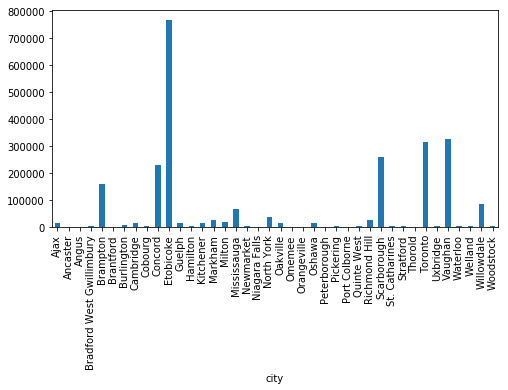

In [27]:
df_1.groupby(['city'])['mac_addr'].count().plot.bar()

In [28]:
series=df_1.groupby(['city'])['mac_addr'].count()

x=['Ajax', 'Ancaster', 'Angus', 'Bradford West Gwillimbury', 'Brampton',
       'Brantford', 'Burlington', 'Cambridge', 'Cobourg', 'Concord',
       'Etobicoke', 'Guelph', 'Hamilton', 'Kitchener', 'Markham', 'Milton',
       'Mississauga', 'Newmarket', 'Niagara Falls', 'North York', 'Oakville',
       'Omemee', 'Orangeville', 'Oshawa', 'Peterborough', 'Pickering',
       'Port Colborne', 'Quinte West', 'Richmond Hill', 'Scarborough',
       'St. Catharines', 'Stratford', 'Thorold', 'Toronto', 'Uxbridge',
       'Vaughan', 'Waterloo', 'Welland', 'Willowdale', 'Woodstock']

y=[ 16812,   1963,    724,   4246, 158652,   1129,   7132,  13987,
         3120, 228202, 766126,  15116,   5743,  15369,  28130,  17977,
        68428,   5089,    826,  37169,  16862,    182,     91,  16140,
          622,   5083,    197,   2687,  27656, 259327,   5024,   4312,
         1984, 315018,   3535, 326827,   5545,   2670,  86914,   4251]

data = [go.Bar(x=x, y=y)]

layout = go.Layout(
    title='Impression',
    
    xaxis=dict(title='',tickfont=dict(size=12)), 
    
    yaxis=dict(title='Count',titlefont=dict(size=20)))
    
   
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='style-bar')



In [29]:

import plotly
pio.write_image(fig, 'images/fig3.png')

#py.plot(fig,filename='sampleplot.html')

plotly.offline.plot(fig, filename='fig1.html') 

'fig1.html'